# Homework 1

Yuwen Xiang

## Part A
Build classification machine learning models in Python:

Develop ML models in Python, using Jupyter Notebook or any other tool of your choice. Apply any three classification algorithms of your choice (example LogisticRegression, SVM, RandomForest). Apply Data Science Process Model as a guide.

Apply GridSearchCV to find the best hyperparameters for your models. (optional step)

Assess model performance (confusion matrix, precision, recall, ROC AUC) and interpret performance from business impact viewpoint (false negatives vs false positives).



In [ ]:
# import the data
import pandas as pd
import numpy as np

churn_data = pd.read_csv("Churn_Modelling.csv")

churn_data.info()

churn_data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# drop unnecessary columns
churn_data.drop('RowNumber', axis=1, inplace=True)

In [ ]:
# check Geography levels
print(churn_data['Geography'].unique()) # will be encoded later

['France' 'Spain' 'Germany']


### Visualization

In [ ]:
# copy data for visualization
churn_data2 = churn_data.copy()

In [ ]:
churn_data2.drop(['CustomerId', 'Surname'], axis=1, inplace=True)

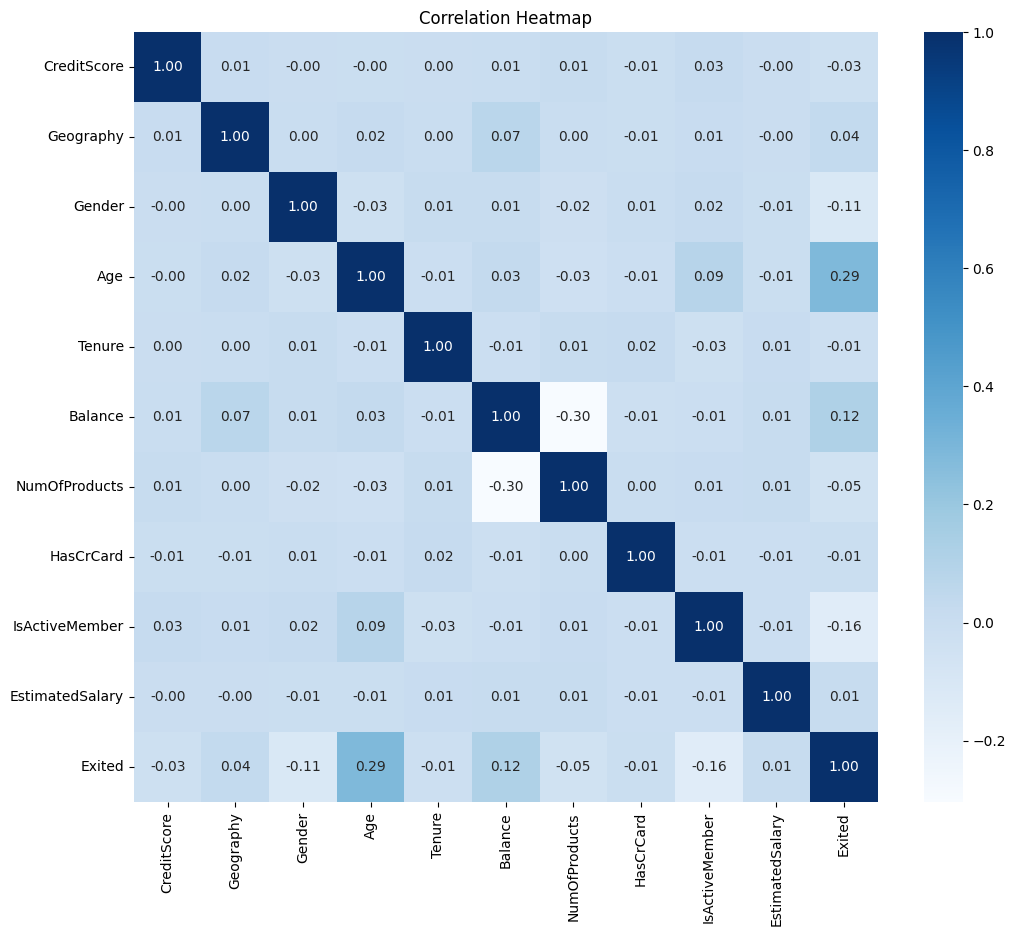

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
churn_data2['Geography'] = label_encoder.fit_transform(churn_data2['Geography'])
churn_data2['Gender'] = label_encoder.fit_transform(churn_data2['Gender'])

corr = churn_data2.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

<ipython-input-57-c5c851f63920>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(churn_data['Gender'], ax=axes[0, 1], palette='GnBu')
<ipython-input-57-c5c851f63920>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(churn_data2['HasCrCard'], ax=axes[2, 0], palette='GnBu')
<ipython-input-57-c5c851f63920>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Exited', data=churn_data2, ax=axes[2, 1], palette='GnBu')
<ipython-input-57-c5c851f63920>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remo

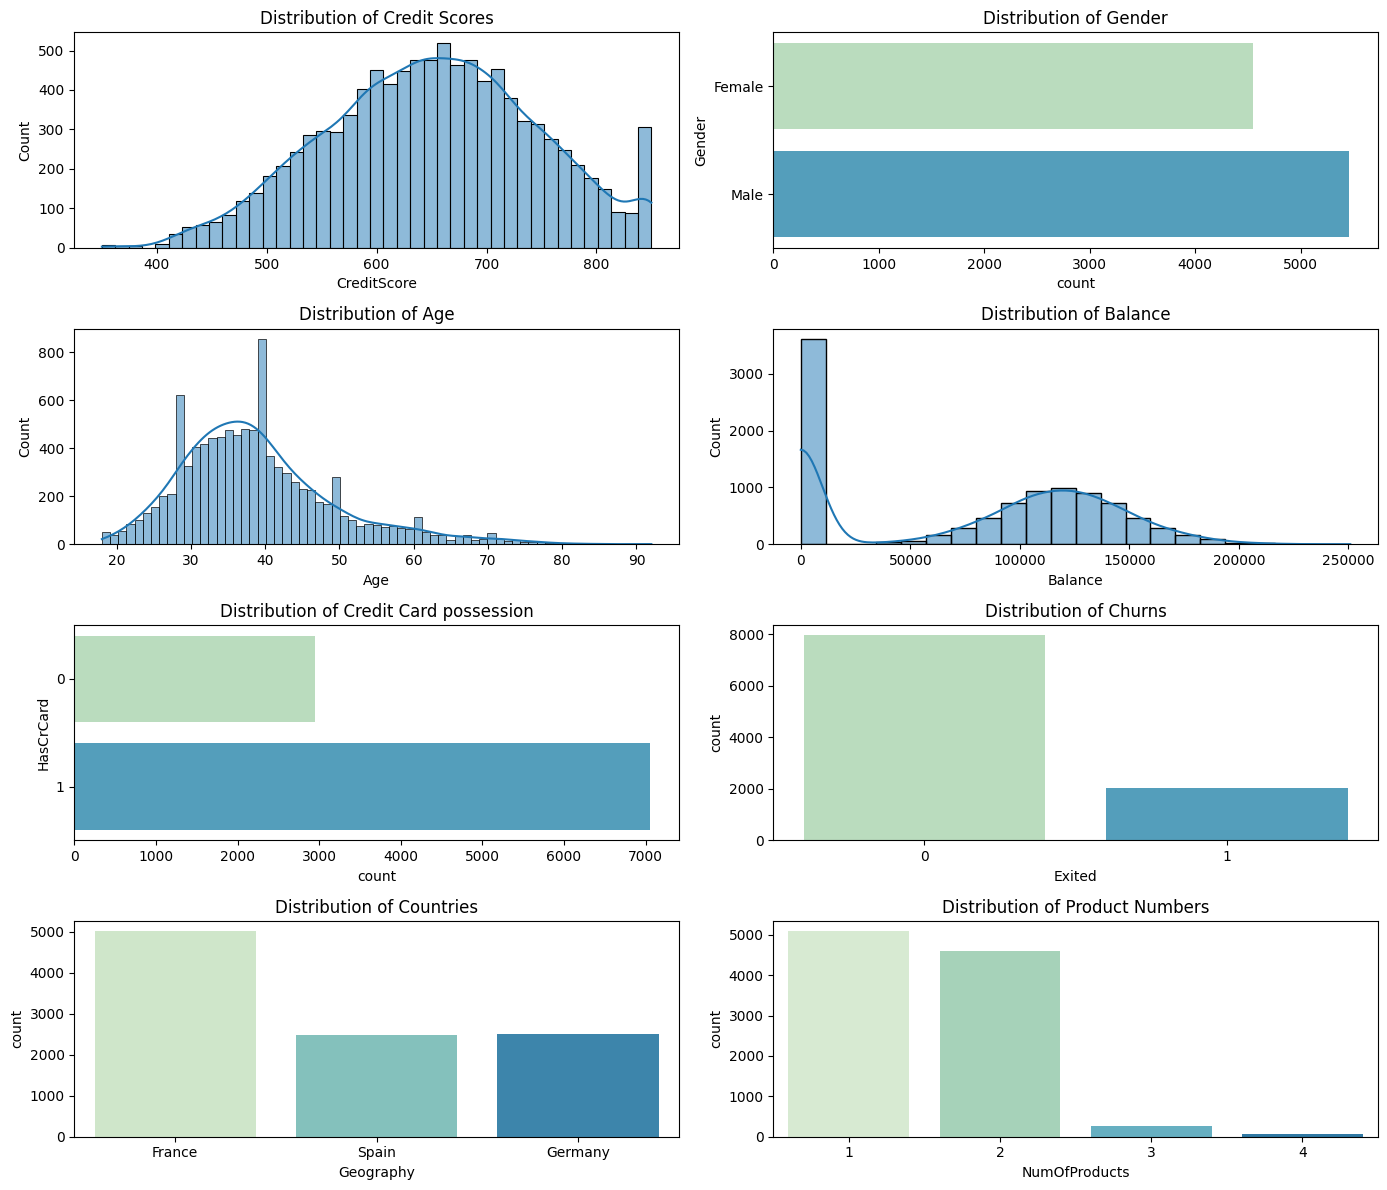

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(14, 12))

# distribution of credit scores
sns.histplot(churn_data2['CreditScore'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Credit Scores')

# distribution of Gender
sns.countplot(churn_data['Gender'], ax=axes[0, 1], palette='GnBu')
axes[0, 1].set_title('Distribution of Gender')

# distribution of Age
sns.histplot(churn_data2['Age'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Age')

# distribution of Balance
sns.histplot(churn_data2['Balance'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Balance')

# distribution of Credit Card possession
churn_data2['HasCrCard'] = churn_data2['HasCrCard'].astype('category')
sns.countplot(churn_data2['HasCrCard'], ax=axes[2, 0], palette='GnBu')
axes[2, 0].set_title('Distribution of Credit Card possession')

# distribution of churns
sns.countplot(x='Exited', data=churn_data2, ax=axes[2, 1], palette='GnBu')
axes[2, 1].set_title('Distribution of Churns')

# distribution of Countries
sns.countplot(x='Geography', data=churn_data, ax=axes[3, 0], palette='GnBu')
axes[3, 0].set_title('Distribution of Countries')

# distribution of Product Numbers
churn_data2['NumOfProducts'] = churn_data2['NumOfProducts'].astype('category')
sns.countplot(x='NumOfProducts', data=churn_data2, ax=axes[3, 1], palette='GnBu')
axes[3, 1].set_title('Distribution of Product Numbers')

plt.tight_layout()
plt.show()

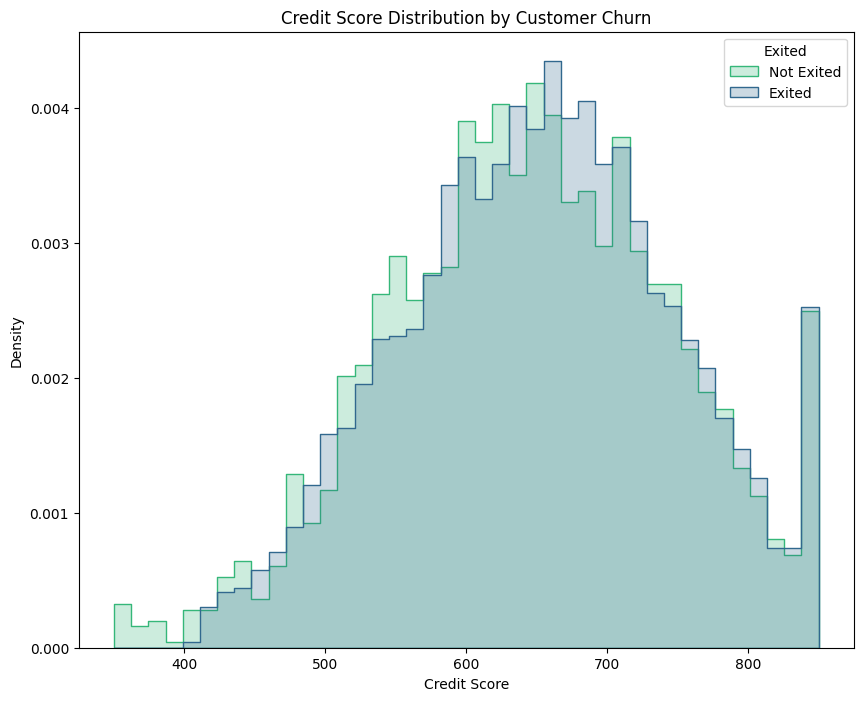

In [ ]:
# credit score vs. exit status
plt.figure(figsize=(10, 8))

sns.histplot(data=churn_data2, x='CreditScore', hue='Exited', element='step', stat='density', common_norm=False, palette='viridis')
plt.title('Credit Score Distribution by Customer Churn')
plt.xlabel('Credit Score')
plt.ylabel('Density')
plt.legend(title='Exited', labels=['Not Exited', 'Exited'])
plt.show()

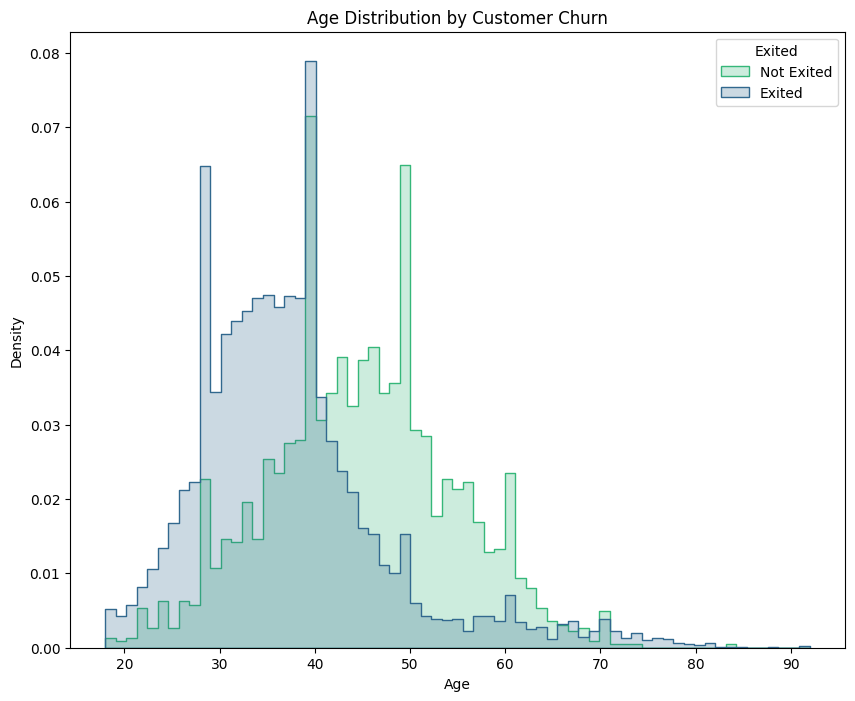

In [ ]:
# age vs. exit status

plt.figure(figsize=(10, 8))
sns.histplot(data=churn_data2, x='Age', hue='Exited', element='step', stat='density', common_norm=False, palette='viridis')
plt.title('Age Distribution by Customer Churn')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Exited', labels=['Not Exited', 'Exited'])
plt.show()

### Data Preparation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

churn_data3 = churn_data.copy()

# encode gender and geography
label_encoder = LabelEncoder()
churn_data3['Geography'] = label_encoder.fit_transform(churn_data3['Geography'])
churn_data3['Gender'] = label_encoder.fit_transform(churn_data3['Gender'])

# scale the data
scaler = StandardScaler()
scaled_columns = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Tenure']
churn_data3[scaled_columns] = scaler.fit_transform(churn_data3[scaled_columns])

# Test-Train Split
X = churn_data3.drop(['Exited', 'CustomerId', 'Surname'], axis=1)
y = churn_data3['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head(5), y_train.head(5)

(      CreditScore  Geography  Gender       Age    Tenure   Balance  \
 9254     0.367013          0       1 -0.660018  0.341352 -1.225848   
 1561    -0.191713          1       1  0.293517 -0.350204  0.691389   
 1670    -0.947028          2       1 -1.422847 -0.695982  0.613102   
 6087    -0.926334          0       0 -1.136786  1.378686  0.948021   
 6669    -1.381593          0       1  1.628468  1.378686  1.052363   
 
       NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
 9254              2          1               1         1.373784  
 1561              2          1               1         1.667407  
 1670              1          1               0        -0.246910  
 6087              1          1               0         0.921446  
 6669              1          0               0        -1.053812  ,
 9254    0
 1561    0
 1670    1
 6087    1
 6669    1
 Name: Exited, dtype: int64)

### Modeling

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score

#### Logistic Regression

In [ ]:
logistic_model = LogisticRegression(random_state=42)

logistic_model.fit(X_train, y_train)

logistic_pred = logistic_model.predict(X_test)

In [ ]:
# evaluate the model
logistic_precision = precision_score(y_test, logistic_pred)
logistic_recall = recall_score(y_test, logistic_pred)
logistic_ROC = roc_auc_score(y_test, logistic_pred)
logistic_cm = confusion_matrix(y_test, logistic_pred)

print(f"Precision: {logistic_precision:.2f}")
print(f"Recall: {logistic_recall:.2f}")
print(f"ROC AUC: {logistic_ROC:.2f}")

Precision: 0.60
Recall: 0.18
ROC AUC: 0.58


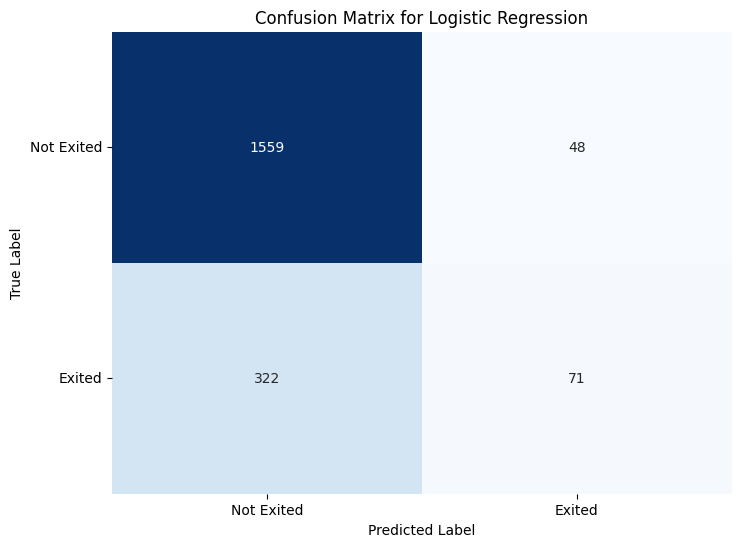

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(logistic_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(ticks=[0.5, 1.5], labels=['Not Exited', 'Exited'])
plt.yticks(ticks=[0.5, 1.5], labels=['Not Exited', 'Exited'], rotation=0)
plt.show()

In [ ]:
# feature selection
lasso_model = LogisticRegression(penalty='l1', solver='liblinear', C=1, random_state=42)
lasso_model.fit(X_train, y_train)

print(lasso_model.coef_)

[[-0.06652165  0.10580676 -0.54013119  0.75156631 -0.03952036  0.30131938
  -0.04914027 -0.00620708 -1.07073453  0.01828952]]


In [ ]:
selected_features = [feature for coef, feature in zip(lasso_model.coef_[0], X.columns) if coef != 0]
print("Selected Features by Lasso:", selected_features)

Selected Features by Lasso: ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']


No paramter is penalized to 0.

#### SVM

In [ ]:
svm_model = SVC(random_state=42)

svm_model.fit(X_train, y_train)

svm_pred = svm_model.predict(X_test)

In [ ]:
# evaluate the model
svm_precision = precision_score(y_test, svm_pred)
svm_recall = recall_score(y_test, svm_pred)
svm_ROC = roc_auc_score(y_test, svm_pred)
svm_cm = confusion_matrix(y_test, svm_pred)

print(f"Precision: {svm_precision:.2f}")
print(f"Recall: {svm_recall:.2f}")
print(f"ROC AUC: {svm_ROC:.2f}")

Precision: 0.79
Recall: 0.35
ROC AUC: 0.66


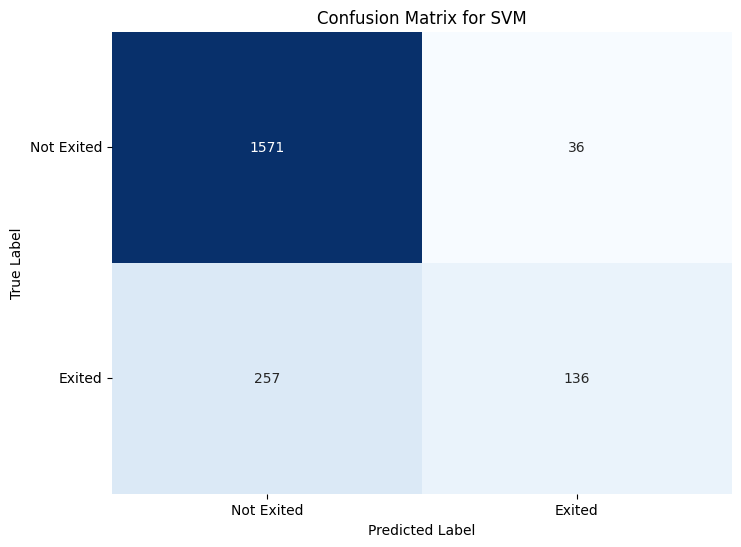

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(ticks=[0.5, 1.5], labels=['Not Exited', 'Exited'])
plt.yticks(ticks=[0.5, 1.5], labels=['Not Exited', 'Exited'], rotation=0)
plt.show()

In [ ]:
# feature selection
from sklearn.feature_selection import RFE

svc = SVC(kernel="linear")
rfe = RFE(estimator=svc, n_features_to_select=10, step=1)
rfe.fit(X_train, y_train)
print("Selected features:", X_train.columns[rfe.support_])

Selected features: Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')


No parameter is dropped.

#### Random Forest

In [ ]:
rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

In [ ]:
# evaluate the model
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_ROC = roc_auc_score(y_test, rf_pred)
rf_cm = confusion_matrix(y_test, rf_pred)

print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")
print(f"ROC AUC: {rf_ROC:.2f}")

Precision: 0.75
Recall: 0.47
ROC AUC: 0.71


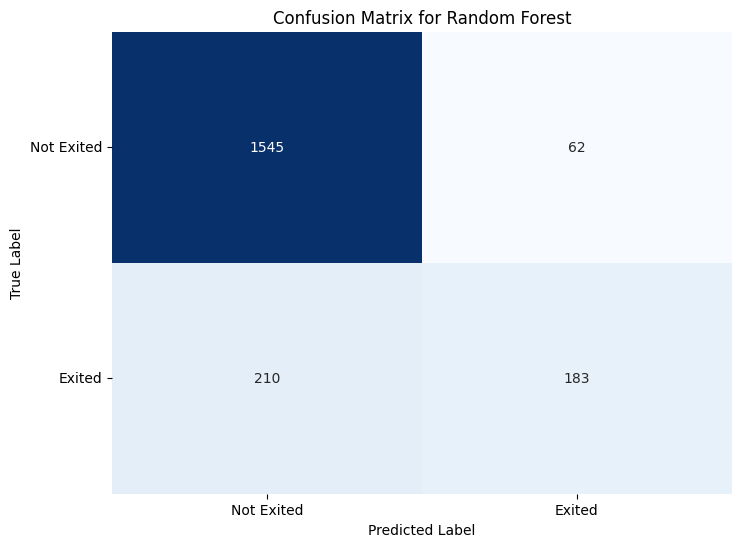

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(ticks=[0.5, 1.5], labels=['Not Exited', 'Exited'])
plt.yticks(ticks=[0.5, 1.5], labels=['Not Exited', 'Exited'], rotation=0)
plt.show()

<ipython-input-35-0417e0b5e1cc>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances_df, palette='GnBu')


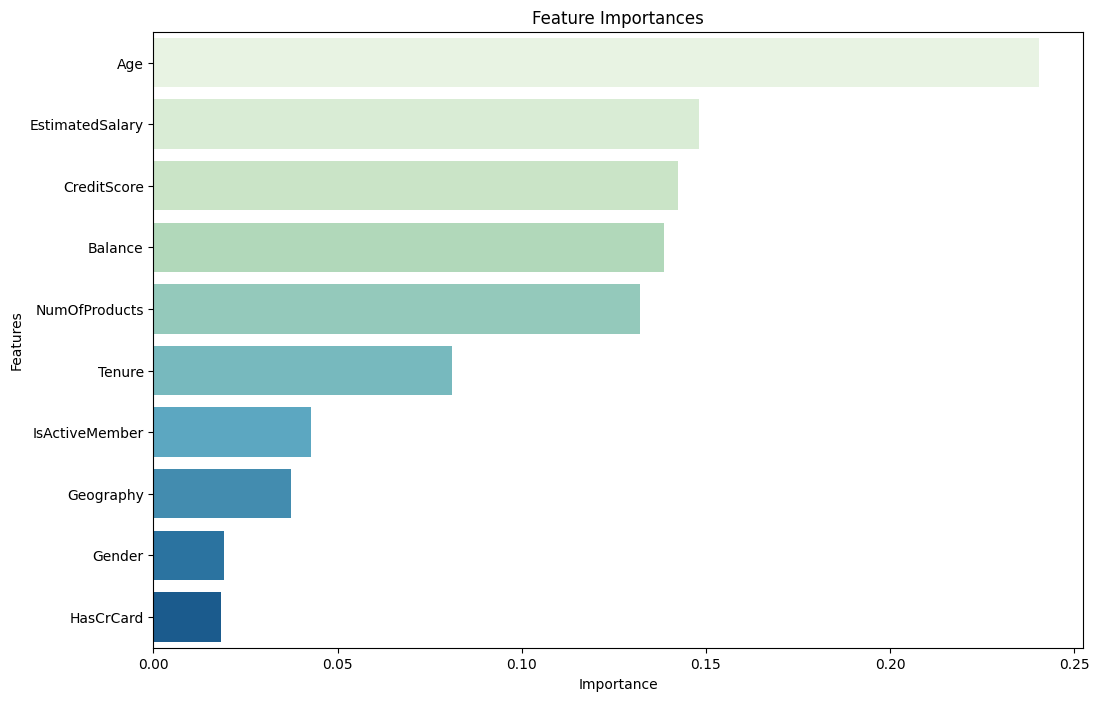

In [ ]:
# feature importance

importances = rf_model.feature_importances_

feature_importances = dict(zip(X_train.columns, importances))
feature_importances_df = pd.DataFrame(list(feature_importances.items()), columns=['Feature', 'Importance'])
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df, palette='GnBu')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

### Summary

In [ ]:
logistic_metrics = {
    'Precision': logistic_precision,
    'Recall': logistic_recall,
    'ROC AUC': logistic_ROC
}

svm_metrics = {
    'Precision': svm_precision,
    'Recall': svm_recall,
    'ROC AUC': svm_ROC
}

rf_metrics = {
    'Precision': rf_precision,
    'Recall': rf_recall,
    'ROC AUC': rf_ROC
}

summary = pd.DataFrame({
    'Logistic Regression': logistic_metrics,
    'SVM': svm_metrics,
    'Random Forest': rf_metrics
})

summary = summary.T
summary

,Precision,Recall,ROC AUC
Logistic Regression,0.596639,0.180662,0.575396
SVM,0.790698,0.346056,0.661827
Random Forest,0.746939,0.465649,0.713534


Briefly speaking, both SVM and Random Forest demonstrated strong performance across the 3 metrics.

Notably, SVM is the best model for having the highest Precision Score, meaning that 79% of positive identifications are correct, which is 'Exited' Churn in our case.

According to the feature importance of the Random Forest Model, Age is the most important, followed by Estimated Salary and Credit Score.

From a business perspective, the high precision of the SVM model is particularly valuable. It means that when a customer is predicted to churn, the bank can be reasonably confident in the accuracy of this prediction and take action. Methods such as promotions or loyalty programs can be effectively deployed to retain these customers. Such strategic actions are crucial for minimizing churn and enhancing customer loyalty.